Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import csv data as Pandas DATAFRAME

df = pd.read_csv(r"C:\Users\DELL\DATA SCIENCE\New_Projects\ML_Project_Pipeline\Notebook\data\StudentsPerformance.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Shape of the dataset

df.shape

(1000, 8)

2.2 Data Checks to perform
  --Check Missing Values
  --Check Duplicates
  --Check Data types
  --Check the number of Unique values of each column
  --Check statistics of data set
  --Check various categories present in the different categorical column 

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
#Check Null and Dtypes
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [7]:
# Check the number of Unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
# Check statistics of data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# Exploring the data

print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:   <StringArray>
['female', 'male']
Length: 2, dtype: str
categories in 'race/ethnicity' variable:   <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
categories in 'parental level of education' variable:   <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
categories in 'lunch' variable:   <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
categories in 'test preparation course' variable:   <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [10]:
# Define Numerical and Categorical columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "string", "category"]).columns.tolist()

print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
# Adding columns for Total Score and Average

df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
# Get the full marks persons information
reading_full = df[df["reading score"] == 100]['average'].count()
writing_full = df[df["writing score"] == 100]['average'].count()
math_full = df[df["math score"] == 100]['average'].count()

print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [13]:
# Get the lessthan 20 marks information

reading_less_20 = df[df["reading score"] <= 20]['average'].count()
writing_less_20 = df[df["writing score"] <= 20]['average'].count()
math_less_20 = df[df["math score"] <= 20]['average'].count()

print(f"Number of students with lessthan 20 marks in math: {math_less_20}")
print(f"Number of students with lessthan 20 marks in reading: {reading_less_20}")
print(f"Number of students with lessthan 20 marks in writing: {writing_less_20}")

Number of students with lessthan 20 marks in math: 4
Number of students with lessthan 20 marks in reading: 1
Number of students with lessthan 20 marks in writing: 3


# 3.Exploring Data (Visualization)
## 3.1 Visualize average score distribution to make some conclusion.
### 1.Histogram
### 2.Kernel Distribution Function(KDE)

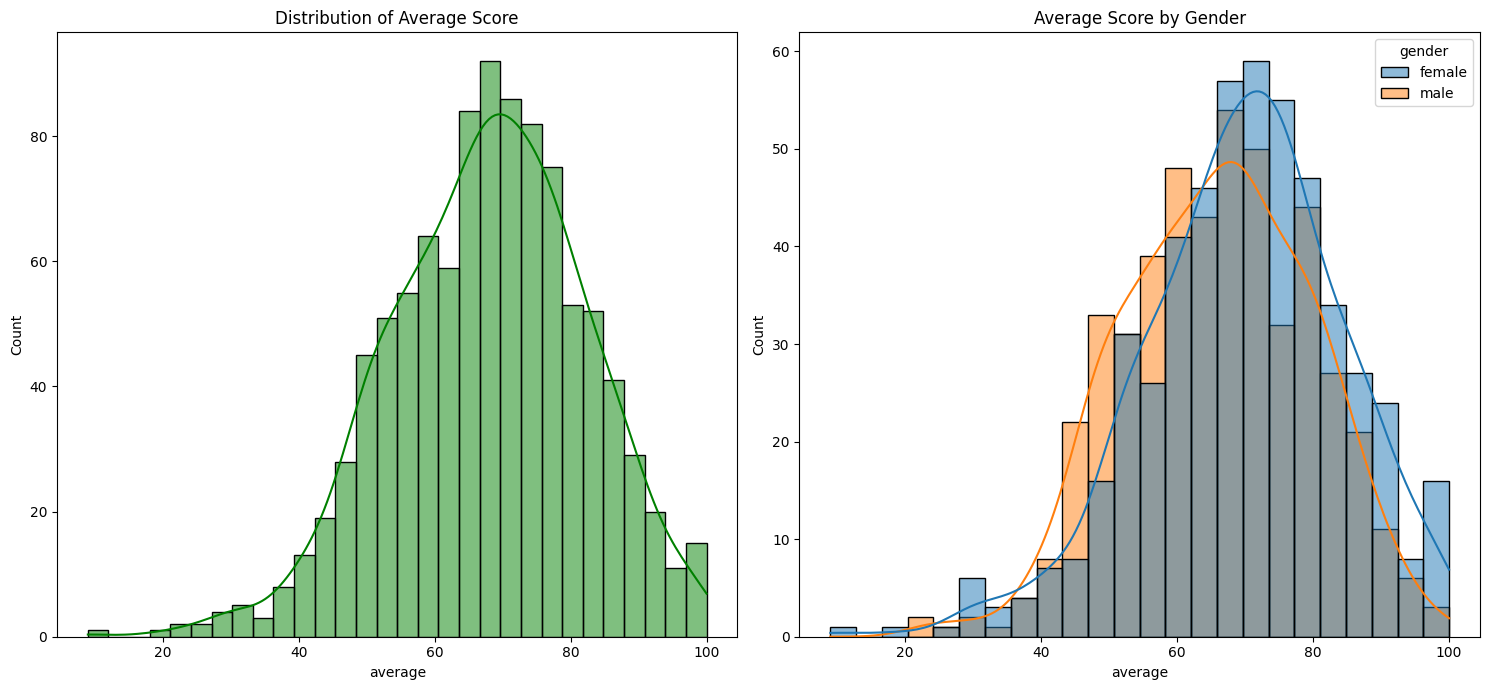

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram + KDE
sns.histplot(
    data=df,
    x="average",
    bins=30,
    kde=True,
    color="g",
    ax=axs[0]
)
axs[0].set_title("Distribution of Average Score")

# Plot 2: Histogram with Hue
sns.histplot(
    data=df,
    x="average",
    hue="gender",
    kde=True,
    ax=axs[1]
)
axs[1].set_title("Average Score by Gender")

plt.tight_layout()
plt.show()

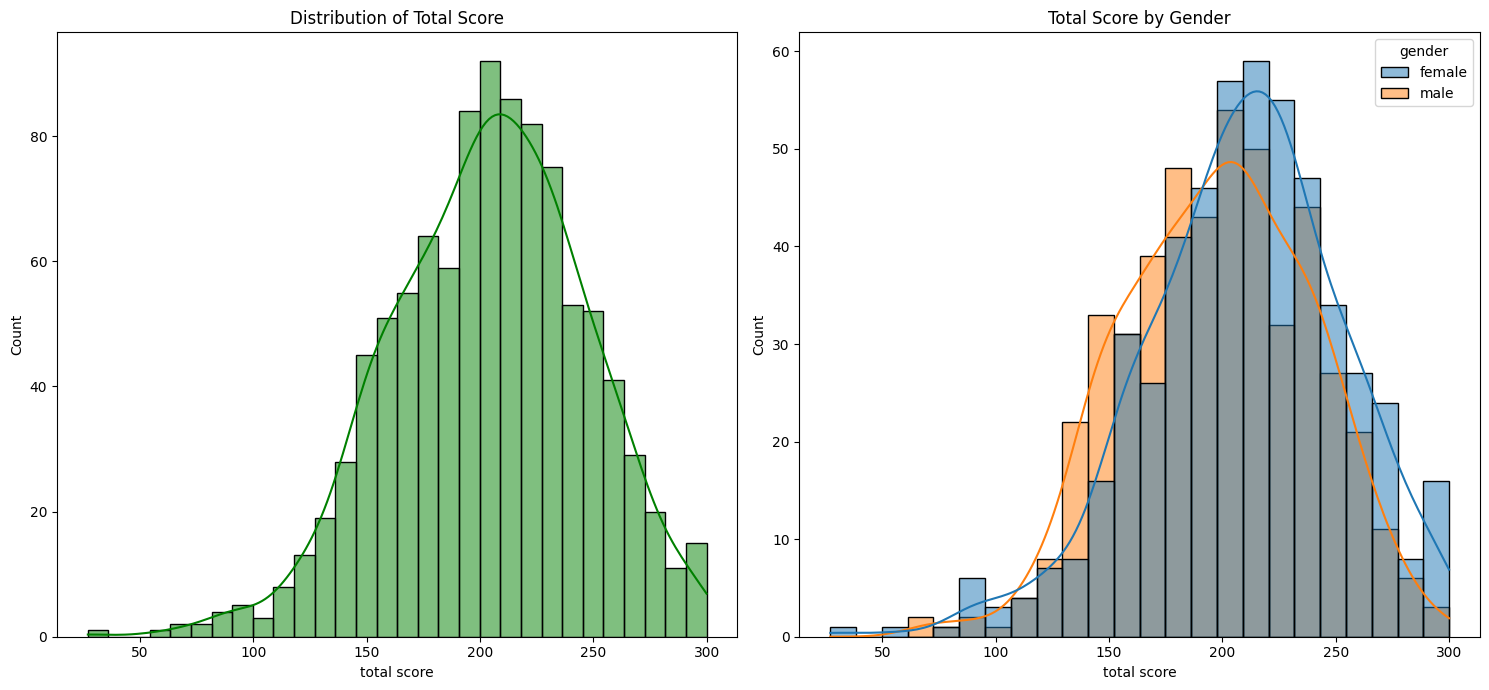

In [15]:
## Total Score

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram + KDE
sns.histplot(
    data=df,
    x="total score",
    bins=30,
    kde=True,
    color="g",
    ax=axs[0]
)
axs[0].set_title("Distribution of Total Score")

# Plot 2: Histogram with Hue
sns.histplot(
    data=df,
    x="total score",
    hue="gender",
    kde=True,
    ax=axs[1]
)
axs[1].set_title("Total Score by Gender")

plt.tight_layout()
plt.show()

In [16]:
## 	race/ethnicity

import matplotlib.pyplot as plt
import seaborn as sns

def plot_score_distribution(df, score_col):
    """
    Plots distribution and race/ethnicity distribution
    for a given score column.
    """

    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    # Plot 1: Histogram + KDE
    sns.histplot(
        data=df,
        x=score_col,
        bins=30,
        kde=True,
        color="g",
        ax=axs[0]
    )
    axs[0].set_title(f"Distribution of {score_col.title()}")

    # Plot 2: Histogram with Hue
    sns.histplot(
        data=df,
        x=score_col,
        hue="race/ethnicity",
        kde=True,
        ax=axs[1]
    )
    axs[1].set_title(f"{score_col.title()} by race/ethnicity")

    plt.tight_layout()
    plt.show()


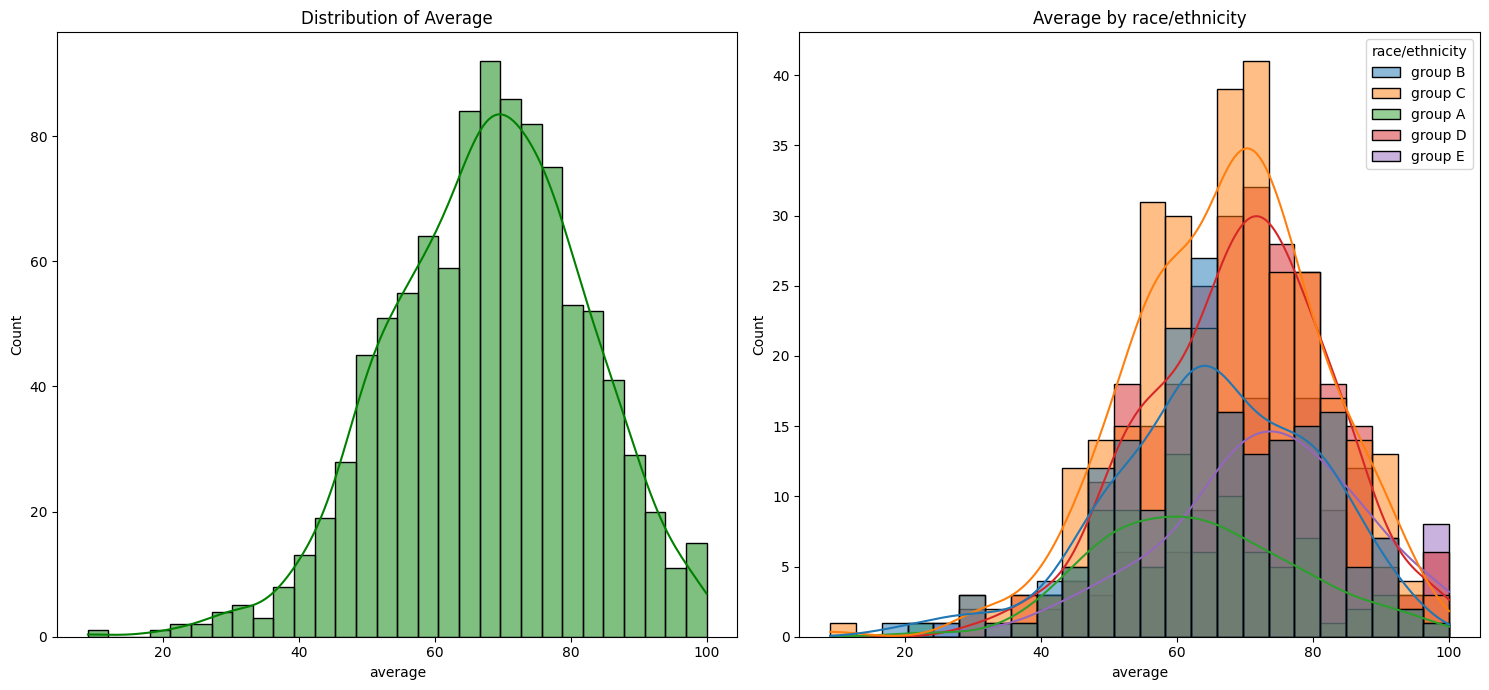

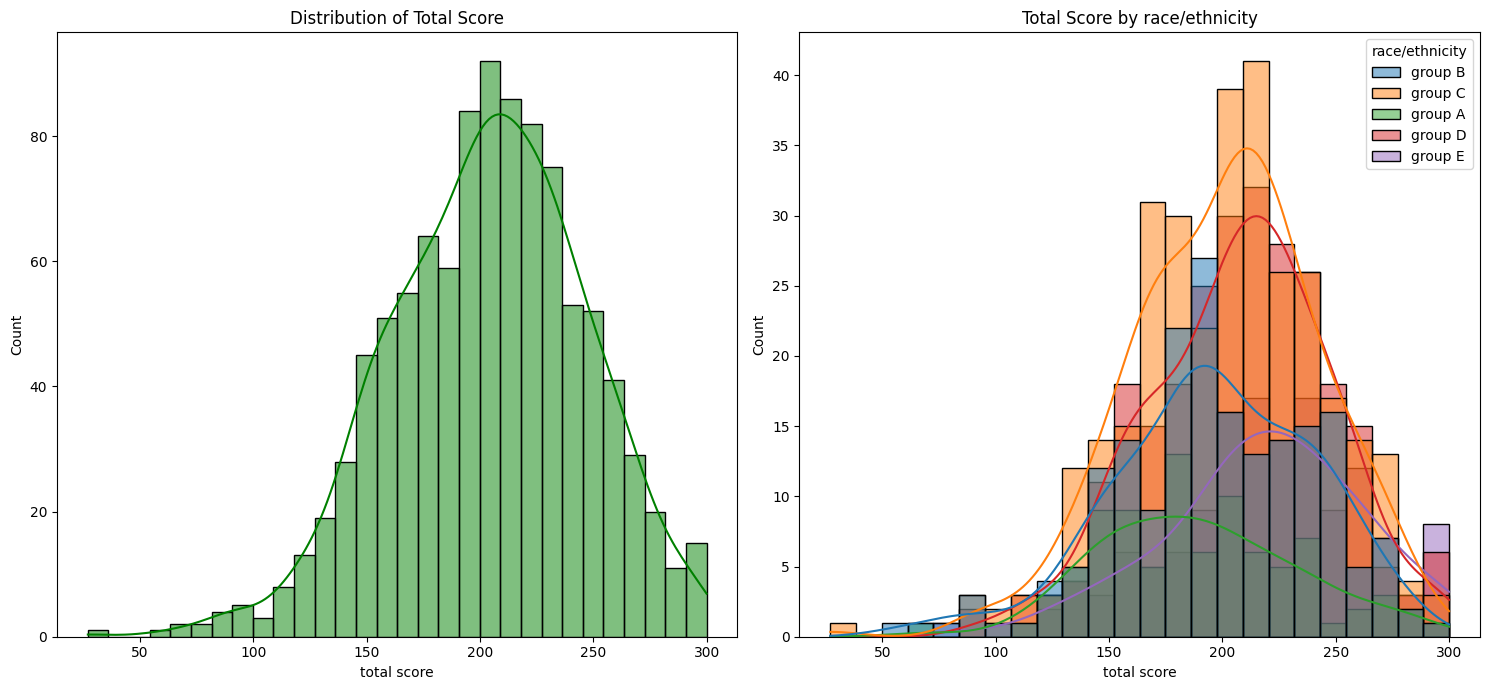

In [17]:
plot_score_distribution(df, "average")
plot_score_distribution(df, "total score")

In [18]:
## 	parental level of education

import matplotlib.pyplot as plt
import seaborn as sns

def plot_score_distribution(df, score_col):
    """
    Plots distribution and parental level of education distribution
    for a given score column.
    """

    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    # Plot 1: Histogram + KDE
    sns.histplot(
        data=df,
        x=score_col,
        bins=30,
        kde=True,
        color="g",
        ax=axs[0]
    )
    axs[0].set_title(f"Distribution of {score_col.title()}")

    # Plot 2: Histogram with Hue
    sns.histplot(
        data=df,
        x=score_col,
        hue="parental level of education",
        kde=True,
        ax=axs[1]
    )
    axs[1].set_title(f"{score_col.title()} by parental level of education")

    plt.tight_layout()
    plt.show()

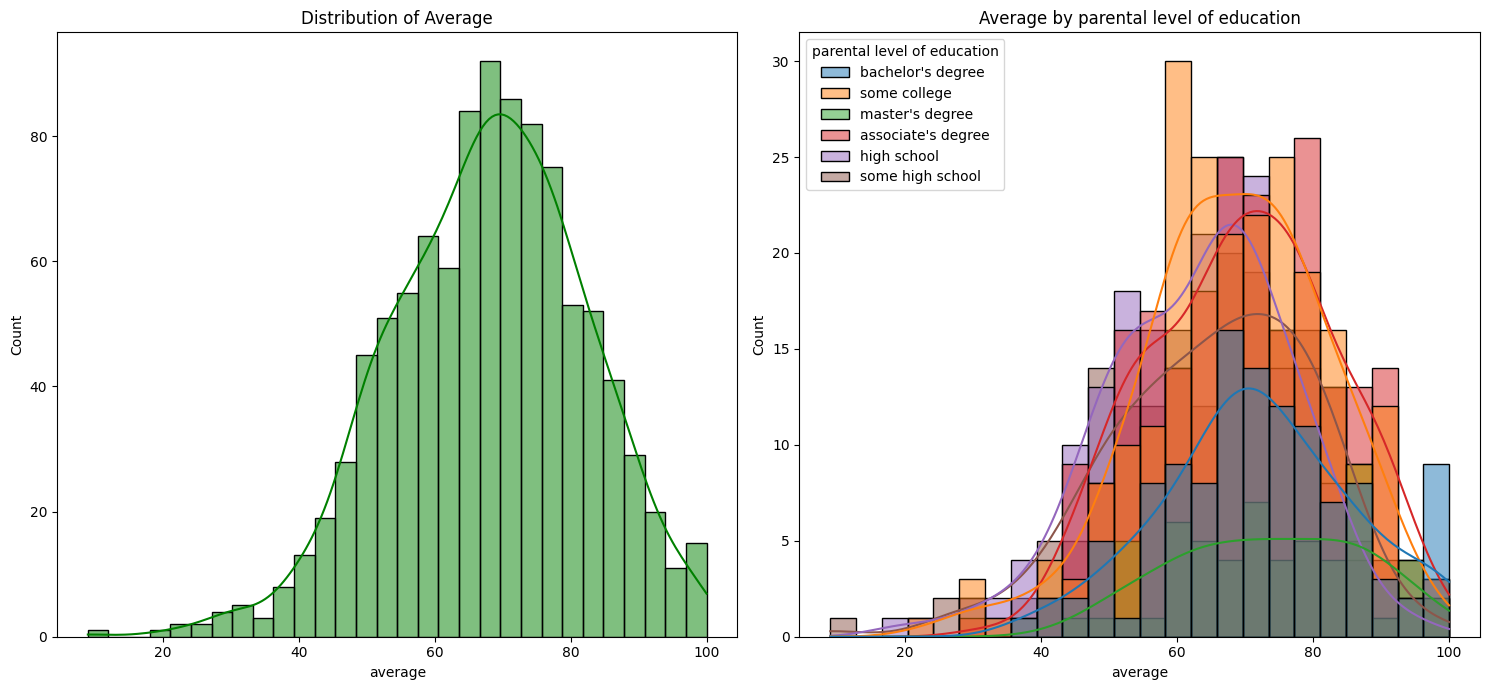

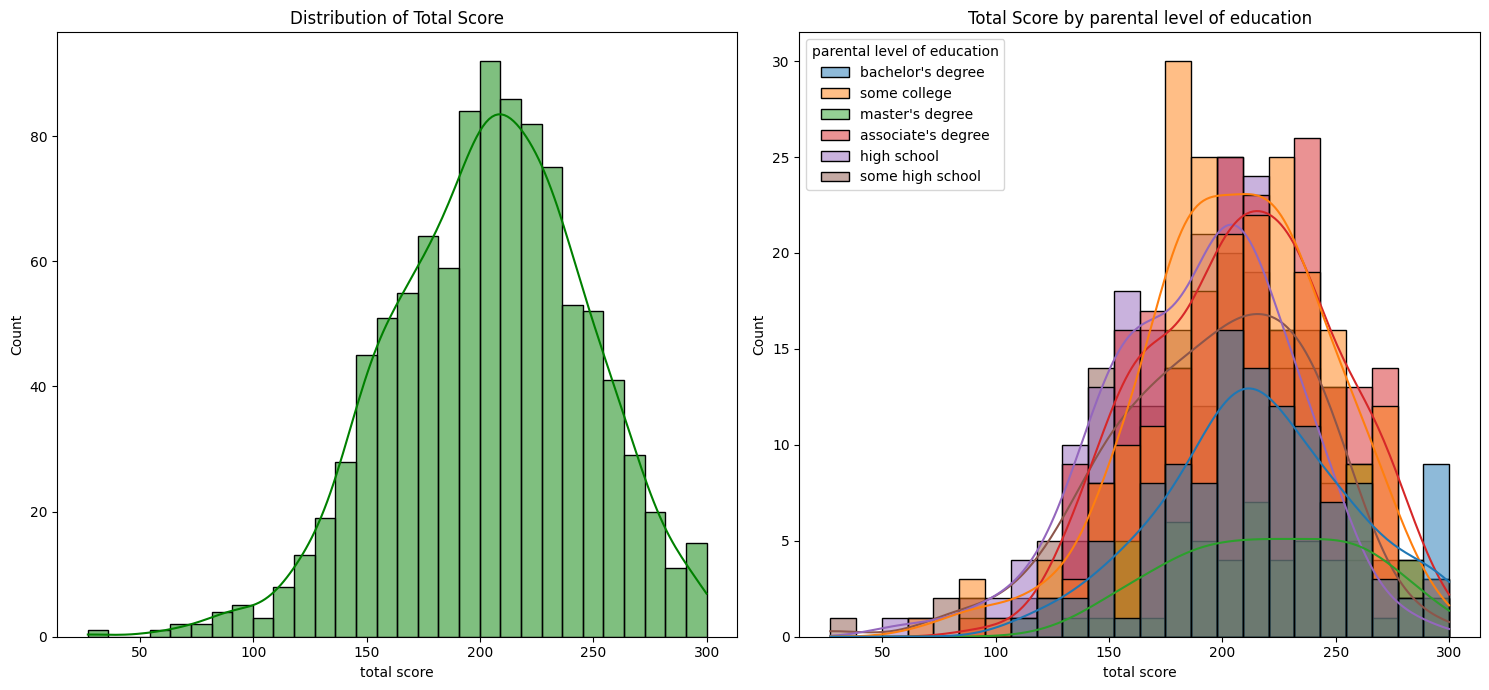

In [19]:
plot_score_distribution(df, "average")
plot_score_distribution(df, "total score")

In [20]:
## 	lunch

import matplotlib.pyplot as plt
import seaborn as sns

def plot_score_distribution(df, score_col):
    """
    Plots distribution and lunch distribution
    for a given score column.
    """

    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    # Plot 1: Histogram + KDE
    sns.histplot(
        data=df,
        x=score_col,
        bins=30,
        kde=True,
        color="g",
        ax=axs[0]
    )
    axs[0].set_title(f"Distribution of {score_col.title()}")

    # Plot 2: Histogram with Hue
    sns.histplot(
        data=df,
        x=score_col,
        hue="lunch",
        kde=True,
        ax=axs[1]
    )
    axs[1].set_title(f"{score_col.title()} by lunch")

    plt.tight_layout()
    plt.show()

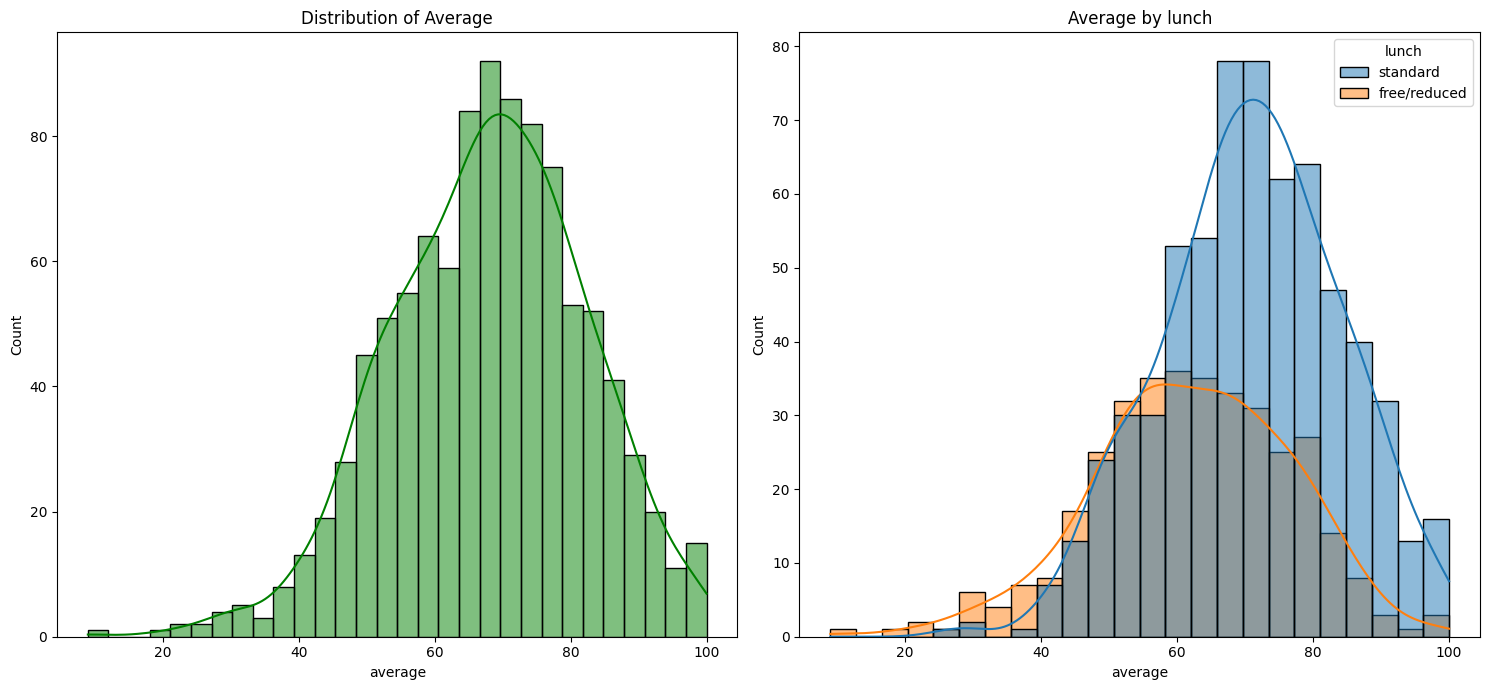

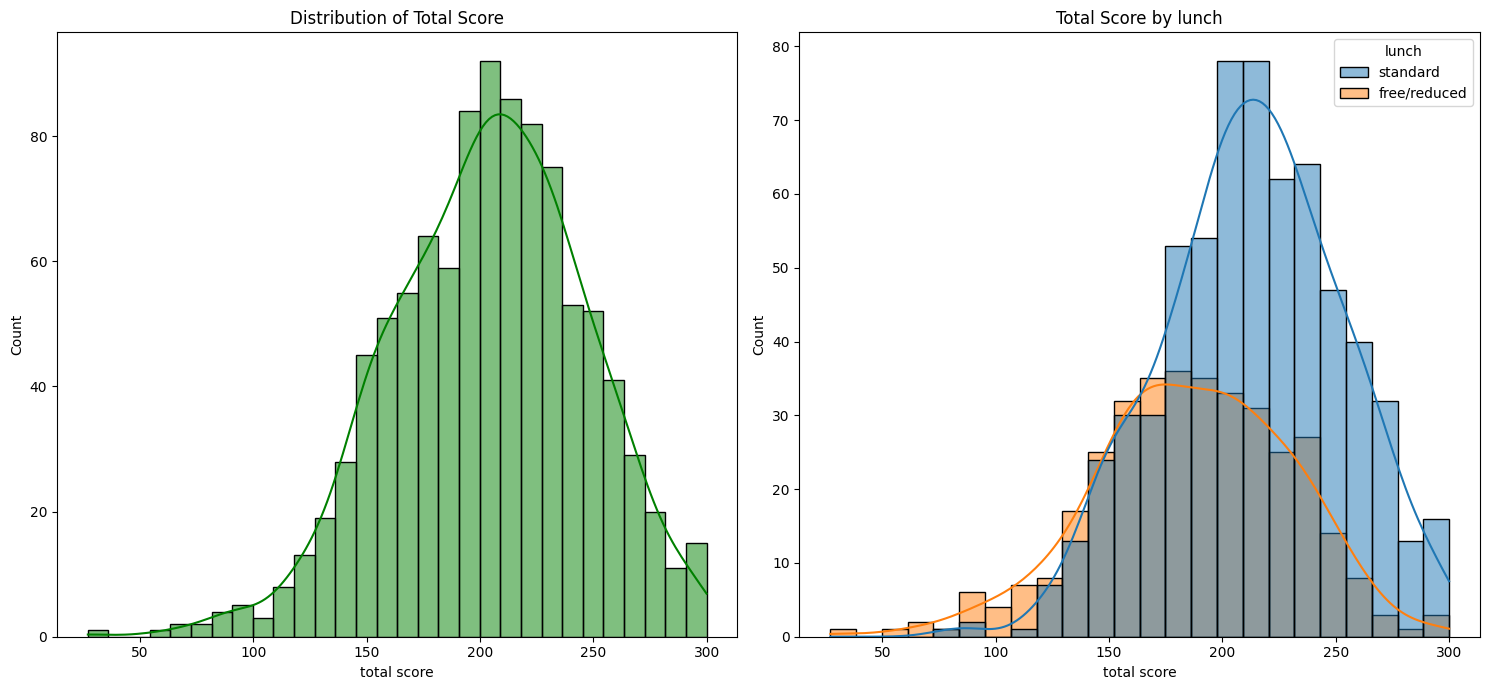

In [21]:
plot_score_distribution(df, "average")
plot_score_distribution(df, "total score")

In [22]:
## 	test preparation course

import matplotlib.pyplot as plt
import seaborn as sns

def plot_score_distribution(df, score_col):
    """
    Plots distribution and test preparation course distribution
    for a given score column.
    """

    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    # Plot 1: Histogram + KDE
    sns.histplot(
        data=df,
        x=score_col,
        bins=30,
        kde=True,
        color="g",
        ax=axs[0]
    )
    axs[0].set_title(f"Distribution of {score_col.title()}")

    # Plot 2: Histogram with Hue
    sns.histplot(
        data=df,
        x=score_col,
        hue="test preparation course",
        kde=True,
        ax=axs[1]
    )
    axs[1].set_title(f"{score_col.title()} by test preparation course")

    plt.tight_layout()
    plt.show()

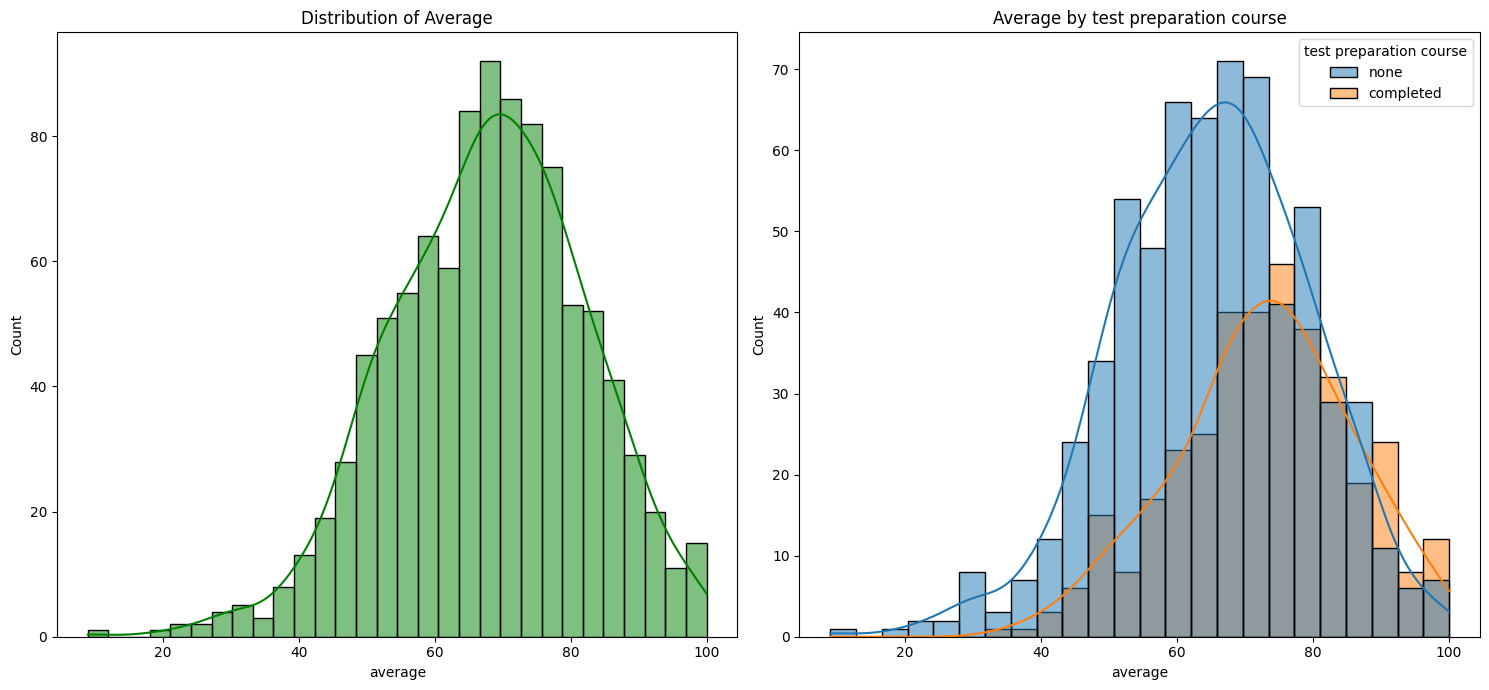

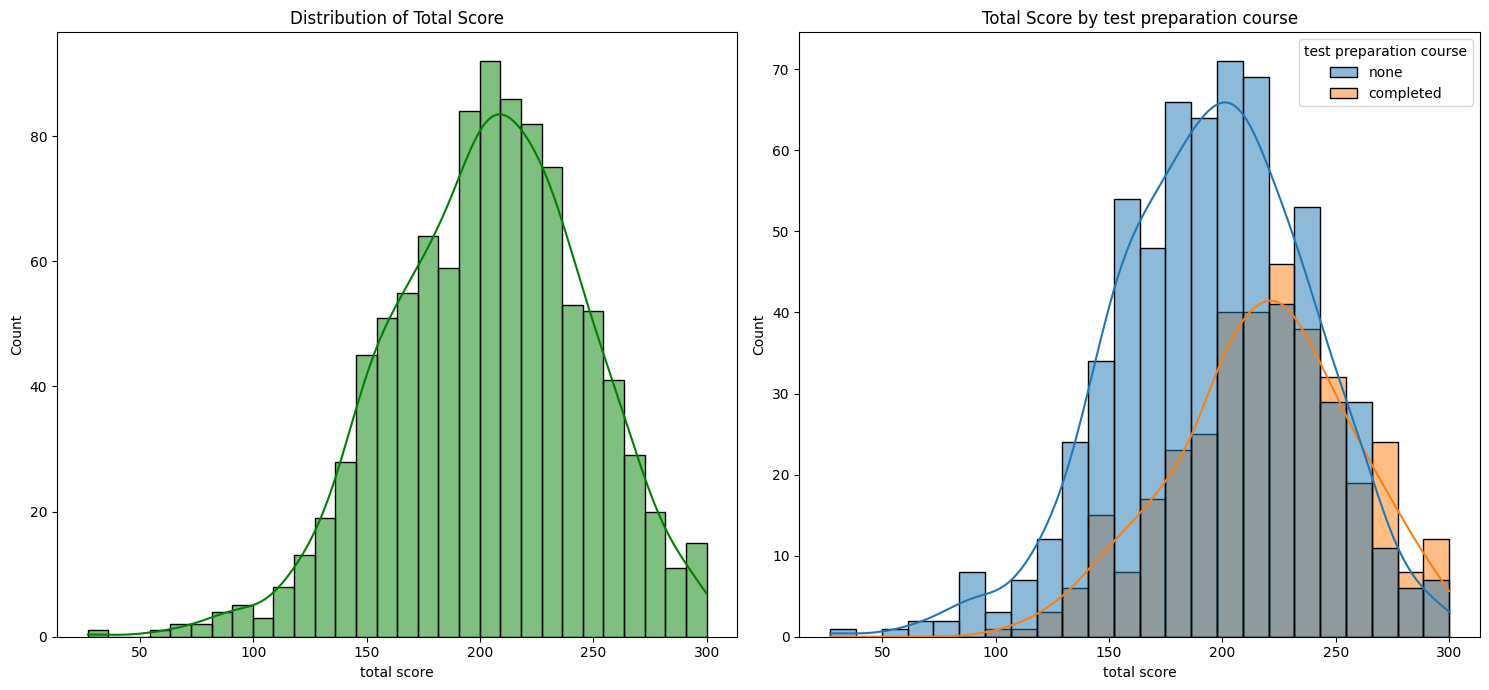

In [23]:
plot_score_distribution(df, "average")
plot_score_distribution(df, "total score")

Maximumum score of students in all three subjects

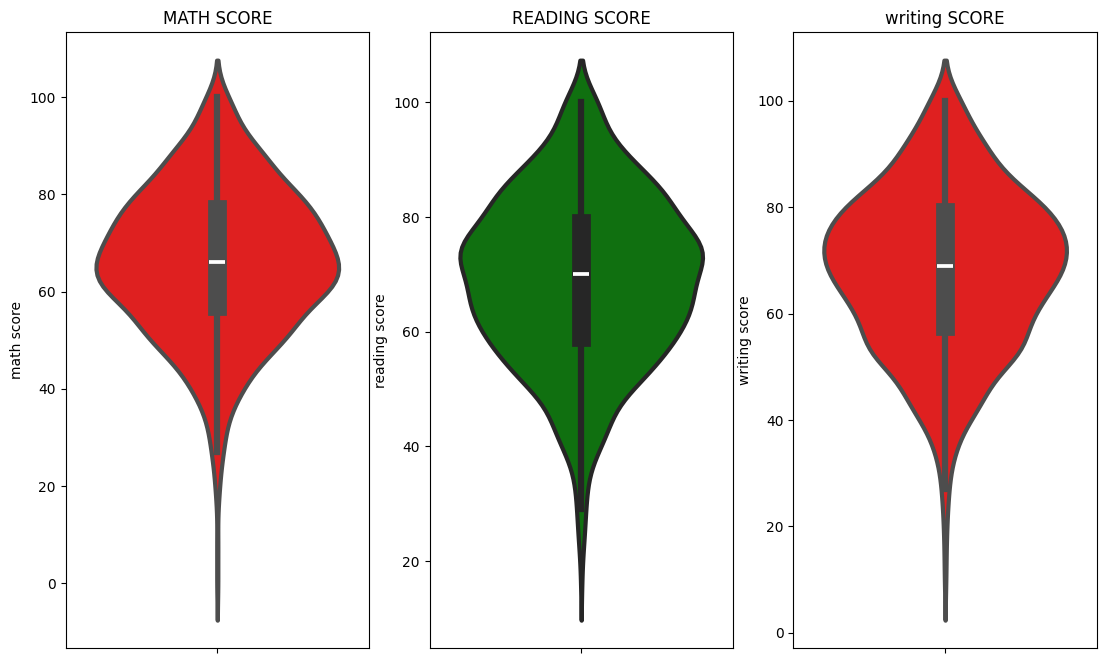

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title("MATH SCORE")
sns.violinplot(y="math score", data=df, color="red", linewidth=3)
plt.subplot(1, 4, 2)
plt.title("READING SCORE")
sns.violinplot(y="reading score", data=df, color="green", linewidth=3)
plt.subplot(1, 4, 3)
plt.title("writing SCORE")
sns.violinplot(y="writing score", data=df, color="red", linewidth=3)
plt.show()

From the above three plots it's clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80 

Multivariate analysis using pieplot

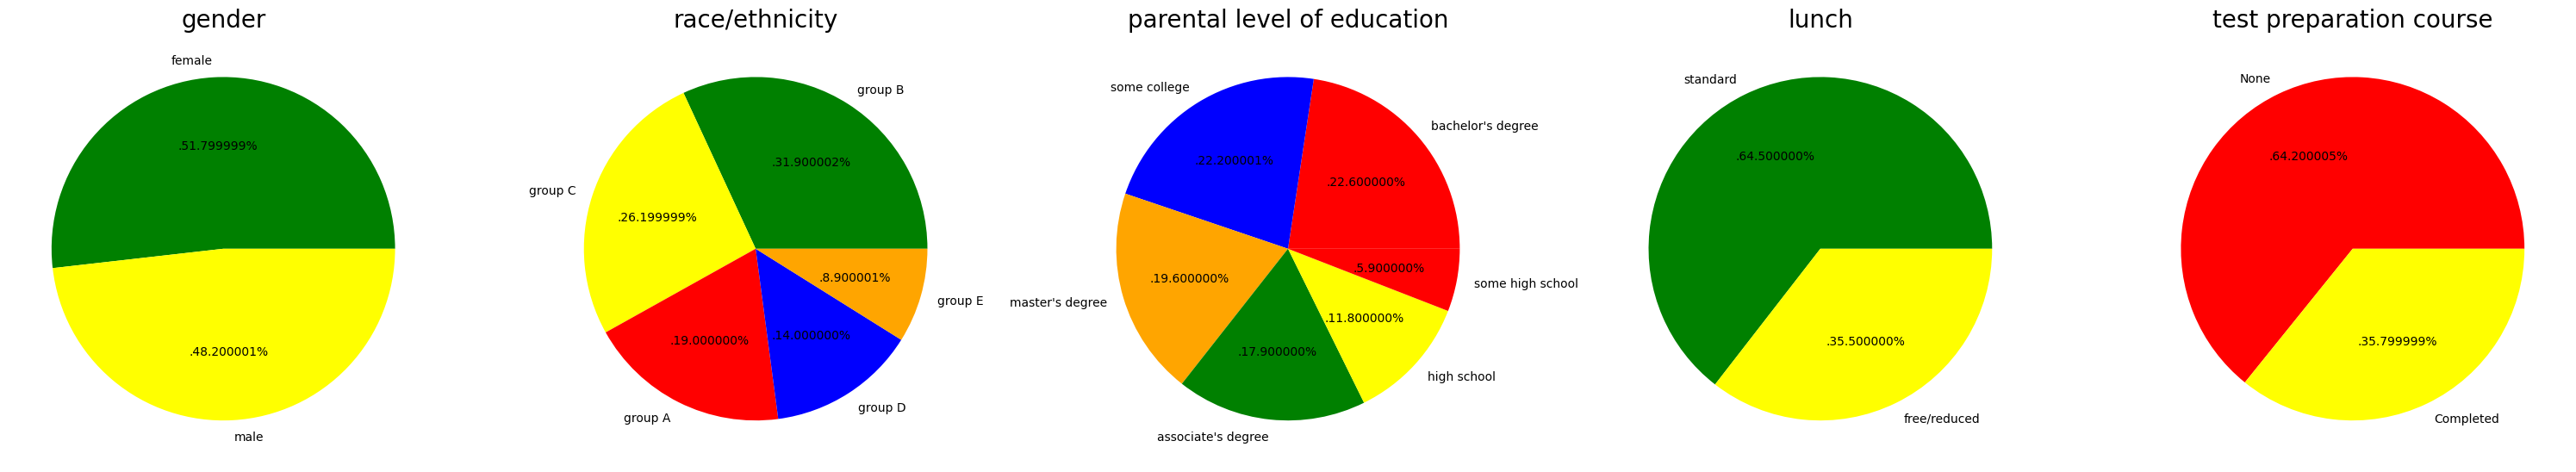

In [25]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'female', 'male'
color = ['green','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['green','yellow','red','blue','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"
color = ['red','blue','orange','green','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('parental level of education', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['green','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('test preparation course', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

# Feature wise Visualization
## Gender Column

### UNIVARIATE ANALYSIS (How is distribution of Gender)

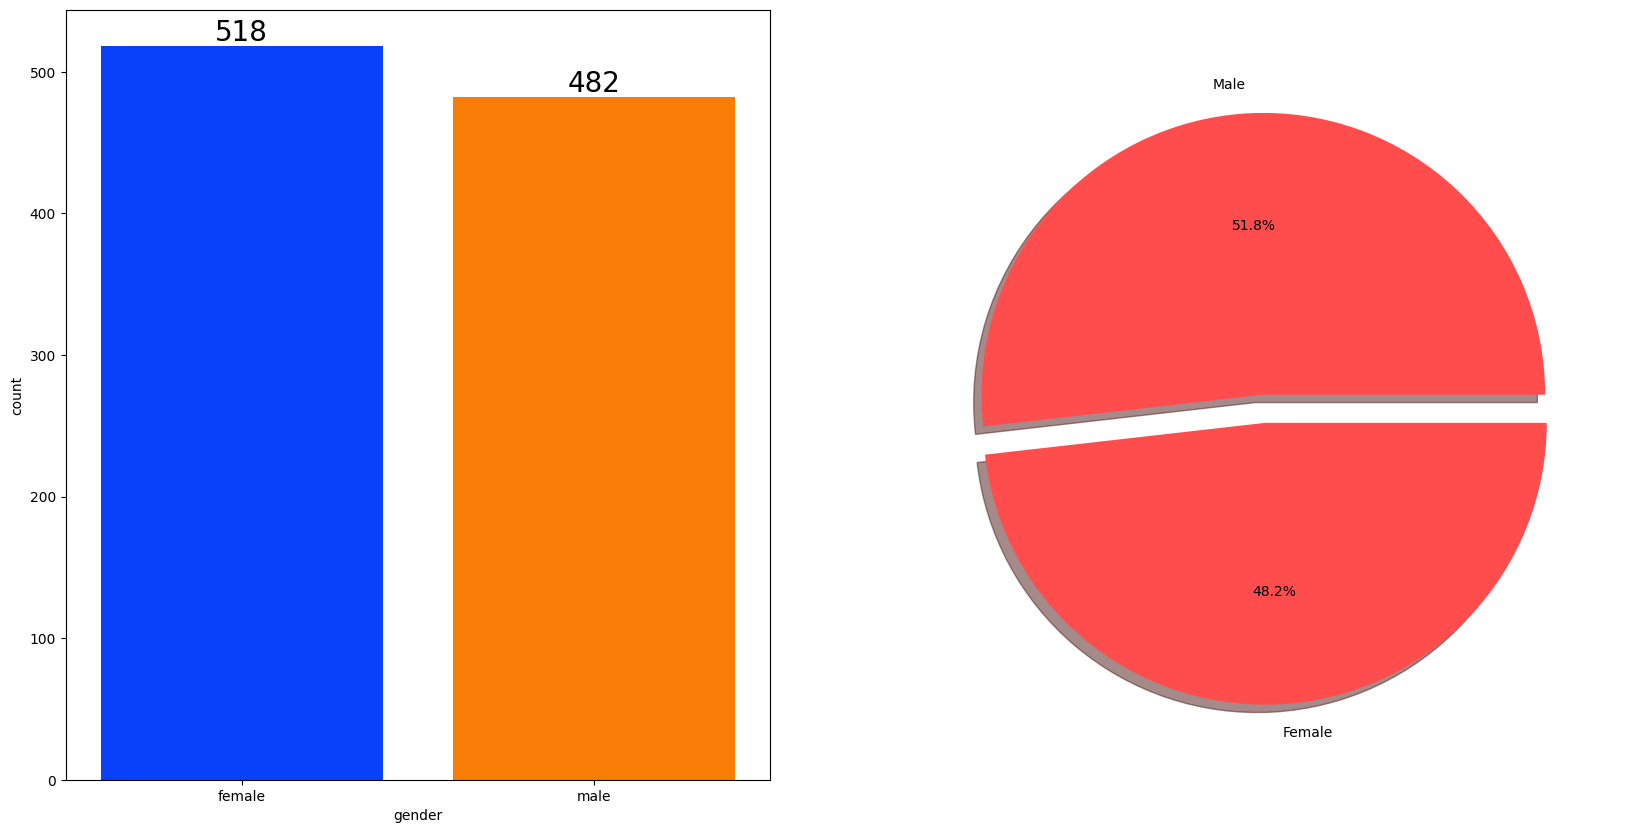

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d'])
plt.show()

# BIVARIATE ANALYSIS (Is Gender has any impact on student's performance?)

In [27]:
gender_group = df.groupby('gender', as_index=False).mean(numeric_only=True)
gender_group

,gender,math score,reading score,writing score,total score,average
0,female,63.633205,72.608108,72.467181,208.708494,69.569498
1,male,68.728216,65.473029,63.311203,197.512448,65.837483


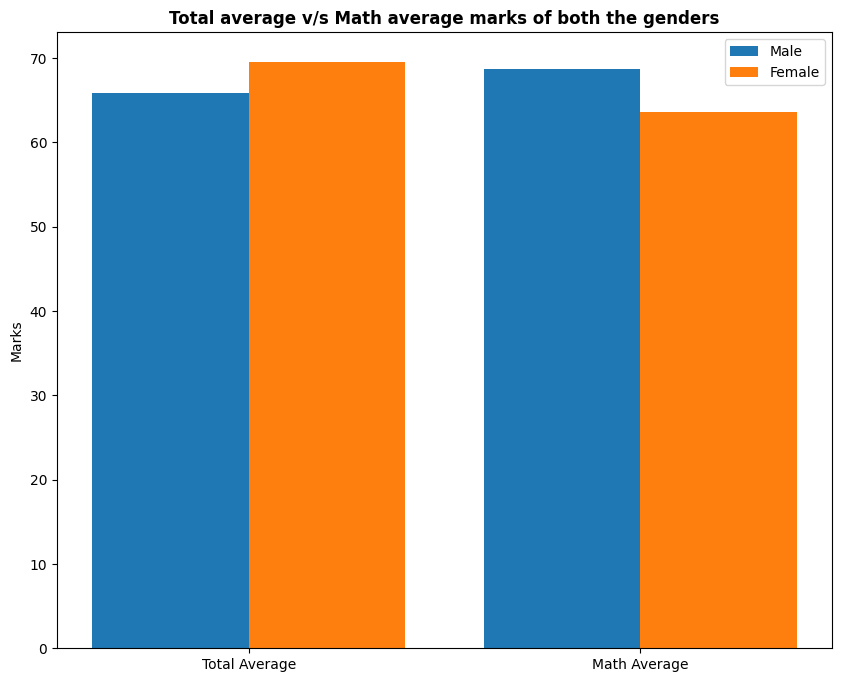

In [28]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# RACE/ETHNICITY COLUMN

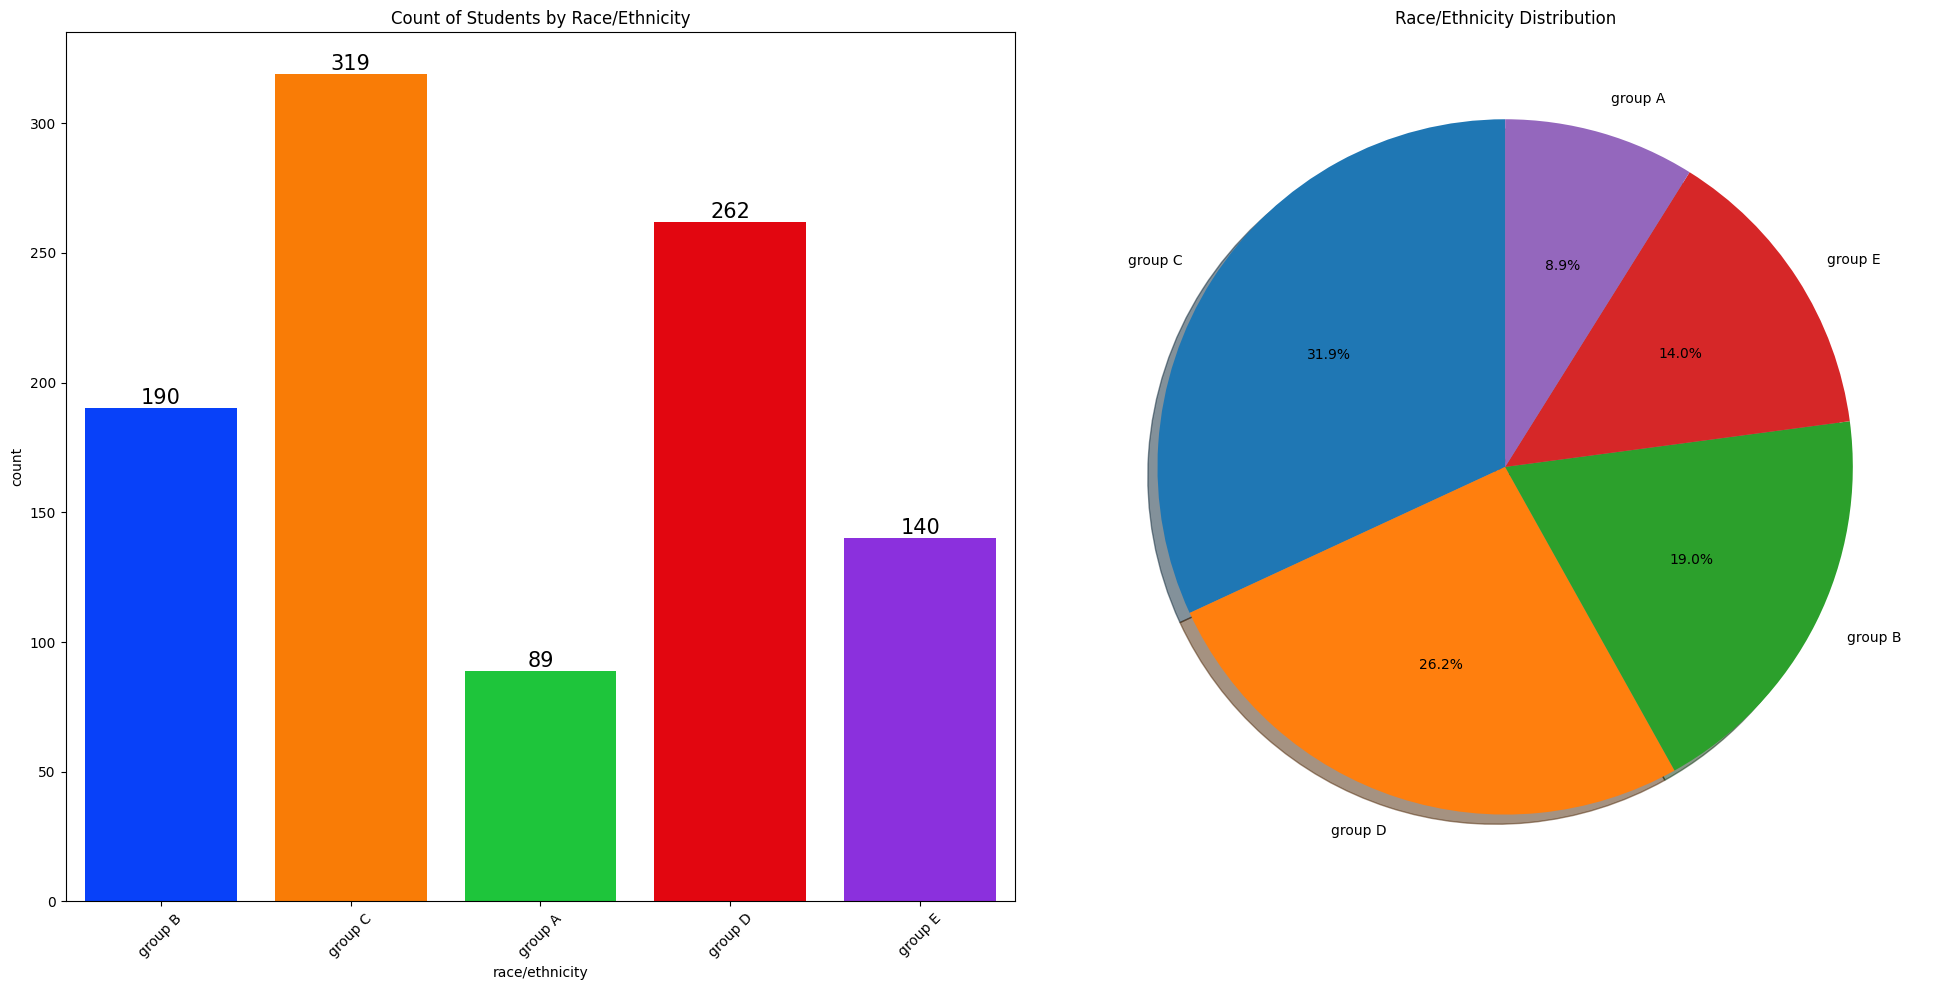

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# ---------------- COUNT PLOT ----------------
sns.countplot(
    x='race/ethnicity',
    data=df,
    palette='bright',
    ax=ax[0],
    saturation=0.95
)

ax[0].set_title("Count of Students by Race/Ethnicity")

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[0].tick_params(axis='x', rotation=45)

# ---------------- PIE CHART ----------------
race_counts = df['race/ethnicity'].value_counts()

ax[1].pie(
    race_counts.values,
    labels=race_counts.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)

ax[1].set_title("Race/Ethnicity Distribution")

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS (Is RACE/ETHNICITY has any impact on student's performance?)

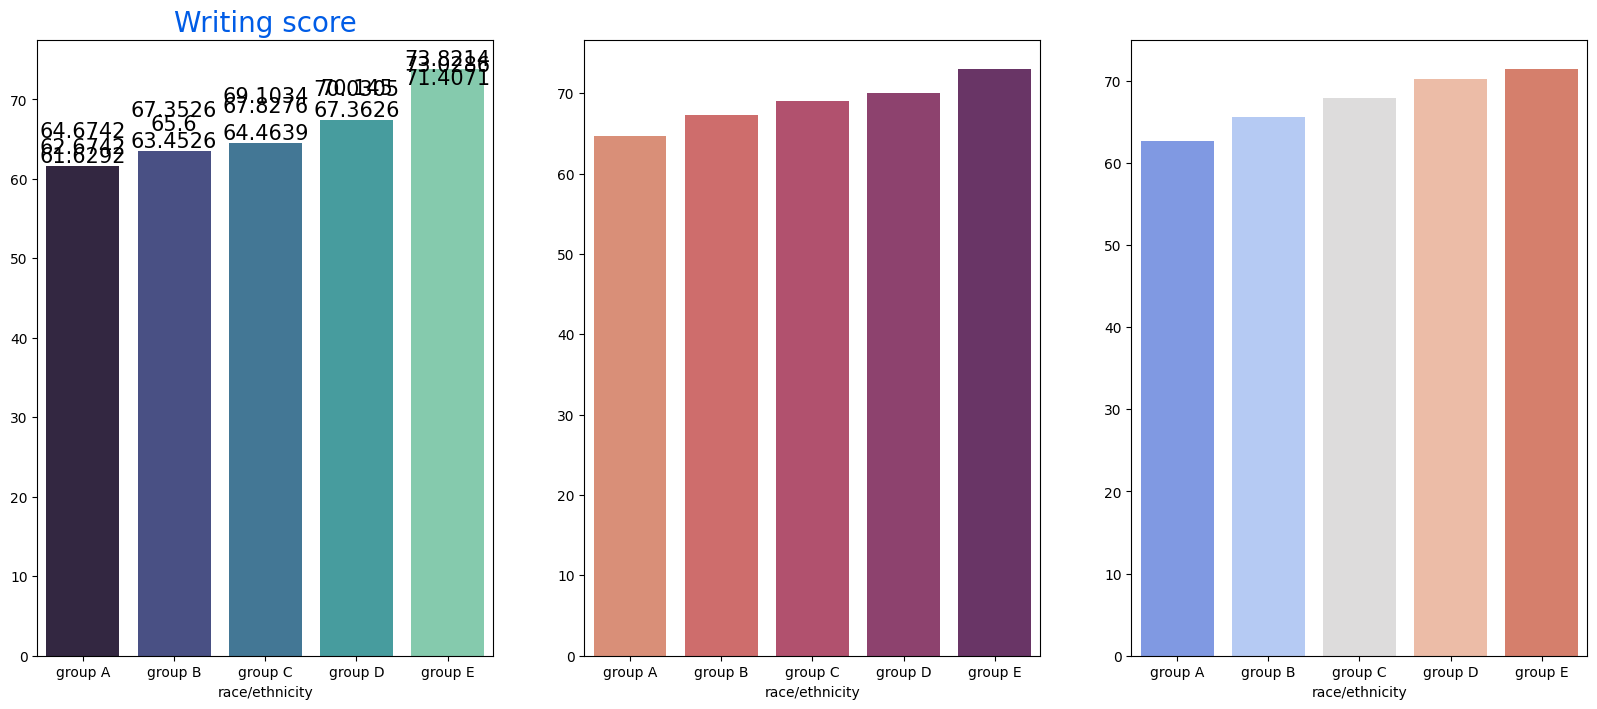

In [30]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score', color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[0].set_title('Reading score', color='#005ce6',size=20)

for container in ax[1].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[0].set_title('Writing score', color='#005ce6',size=20)

for container in ax[2].containers:
    ax[0].bar_label(container,color='black',size=15)

# Parental level of education
## UNIVARIATE ANALYSIS

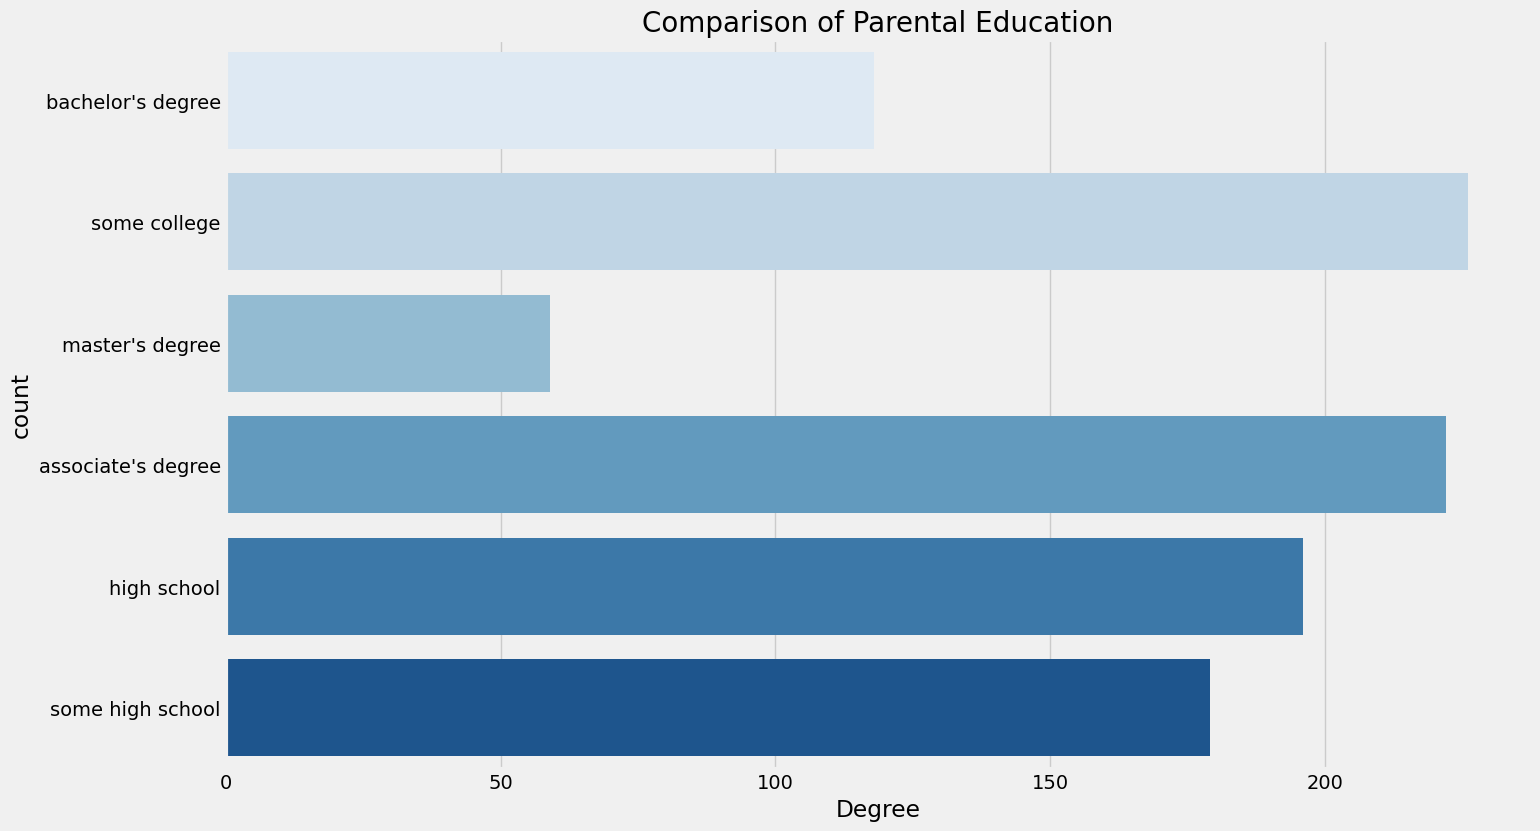

In [31]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette= 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## The above chart shows Largest number of parents are from some college

# BIVARIATE ANALYSIS

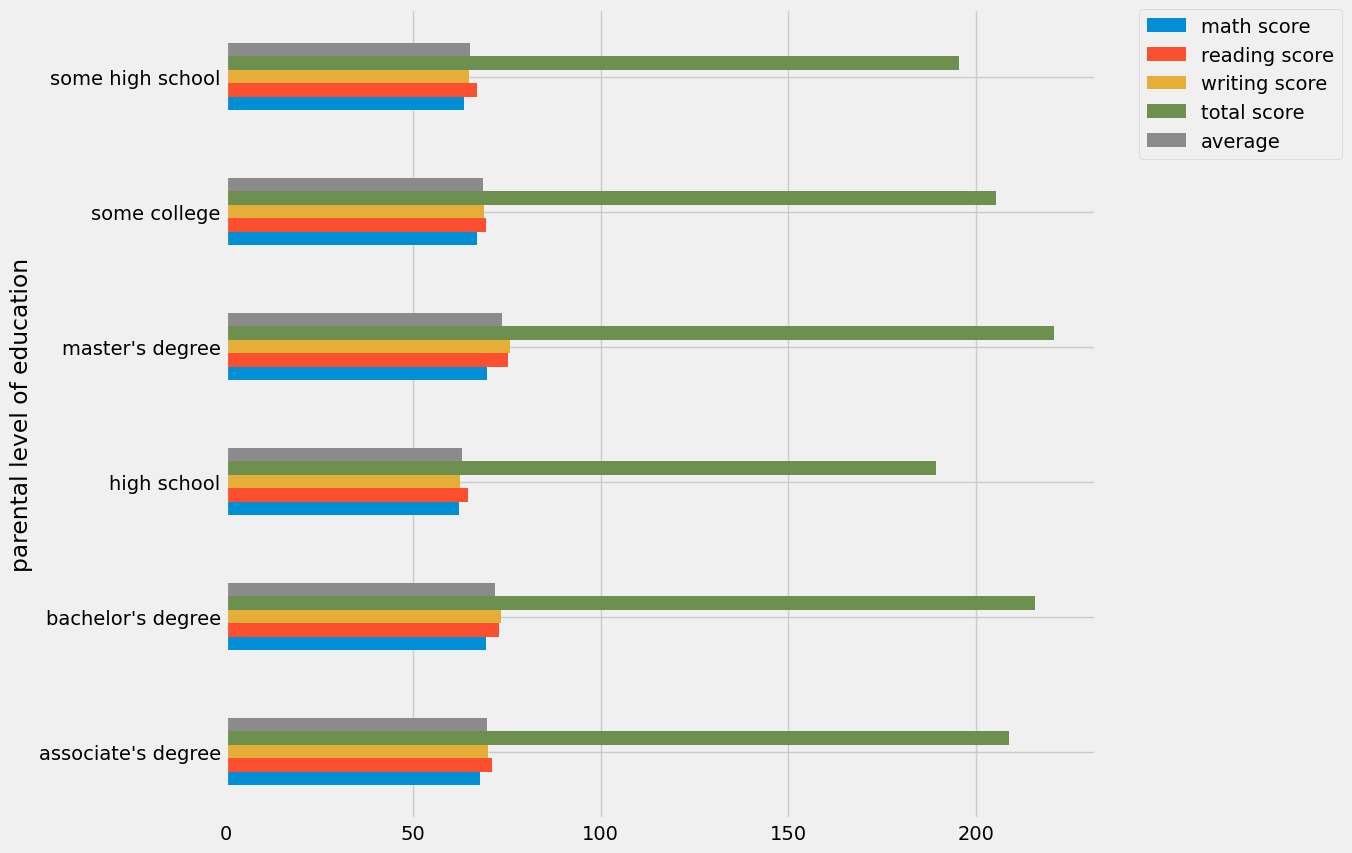

In [33]:
#df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The score of students whose parents passess maste and bachelor level education are higher than others

# LUNCH COLUMN
## UNIVARITE ANALYSIS

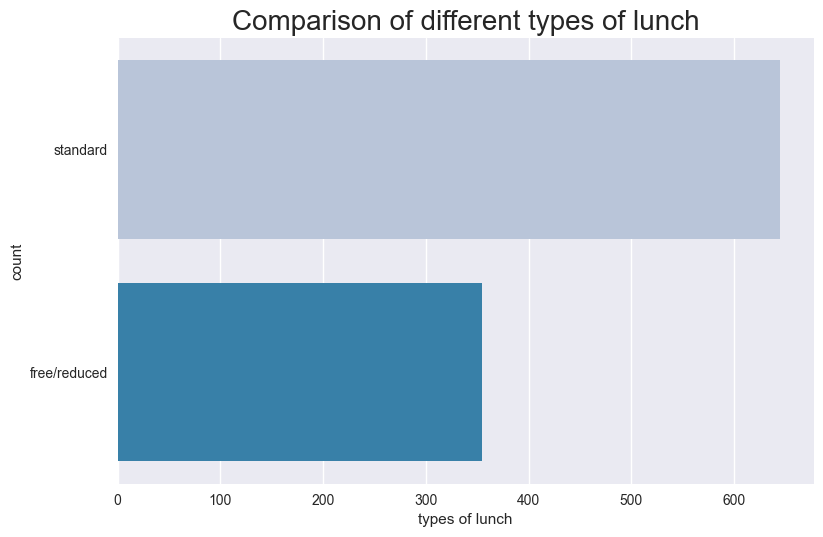

In [35]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-v0_8')
sns.countplot(df['lunch'], palette= 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Students being served standard lunch was more than free lunch

# BIVARITE ANALYSIS

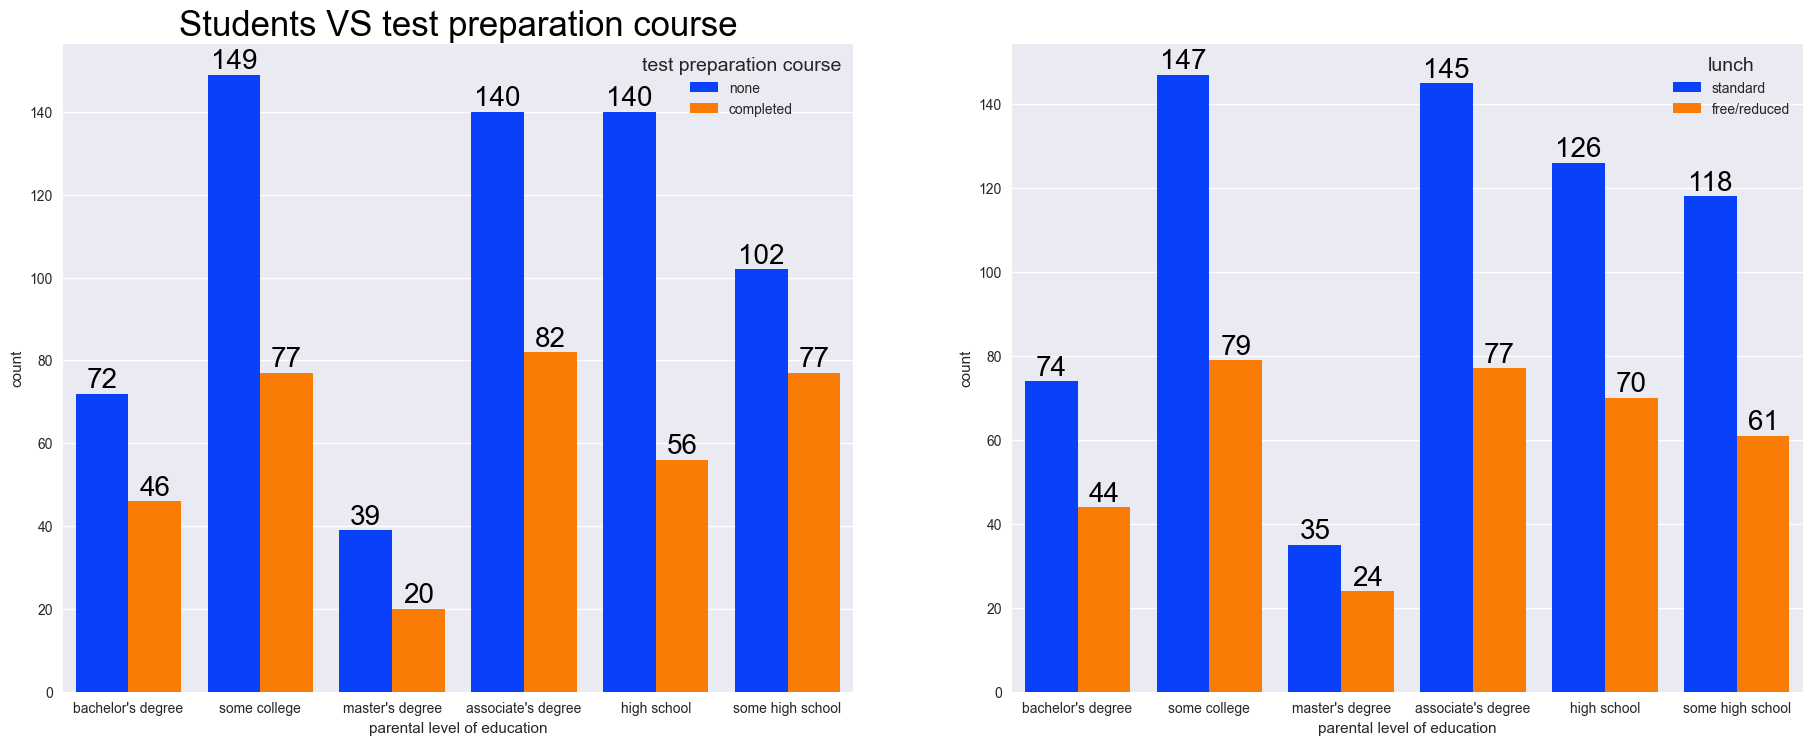

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette= 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students VS test preparation course', color='black',size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette= 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

Students who get standerd students perform better than students who got free lunch

# TEST PREPARATION COURSE COLUMN
# BIVARIATE ANALYSIS

<Axes: xlabel='lunch', ylabel='writing score'>

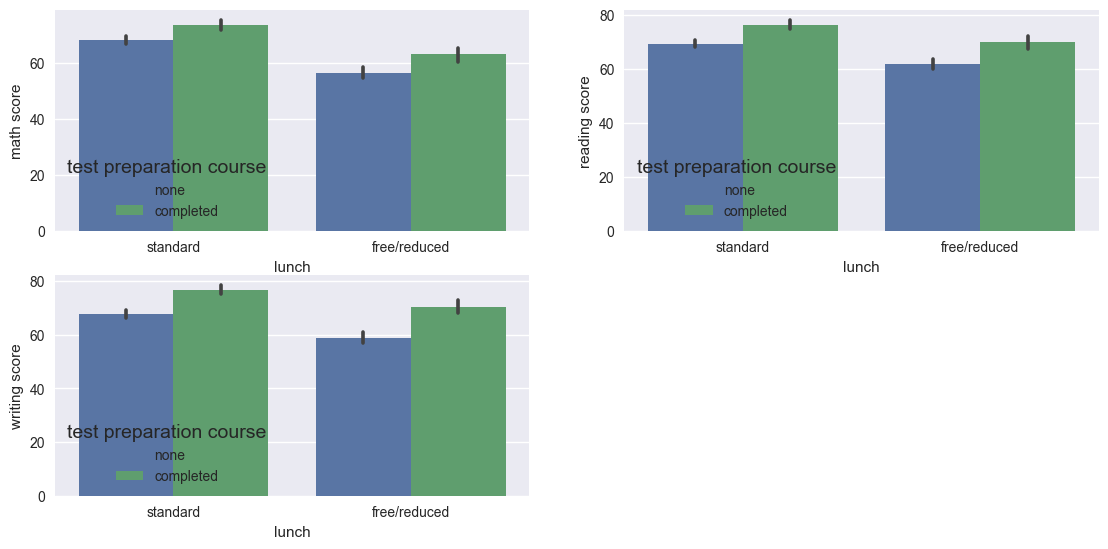

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

The above chart shows who have completed the test preparation course students score higher in all three categories who haven't taken course

# CHECKING OUTLIERS

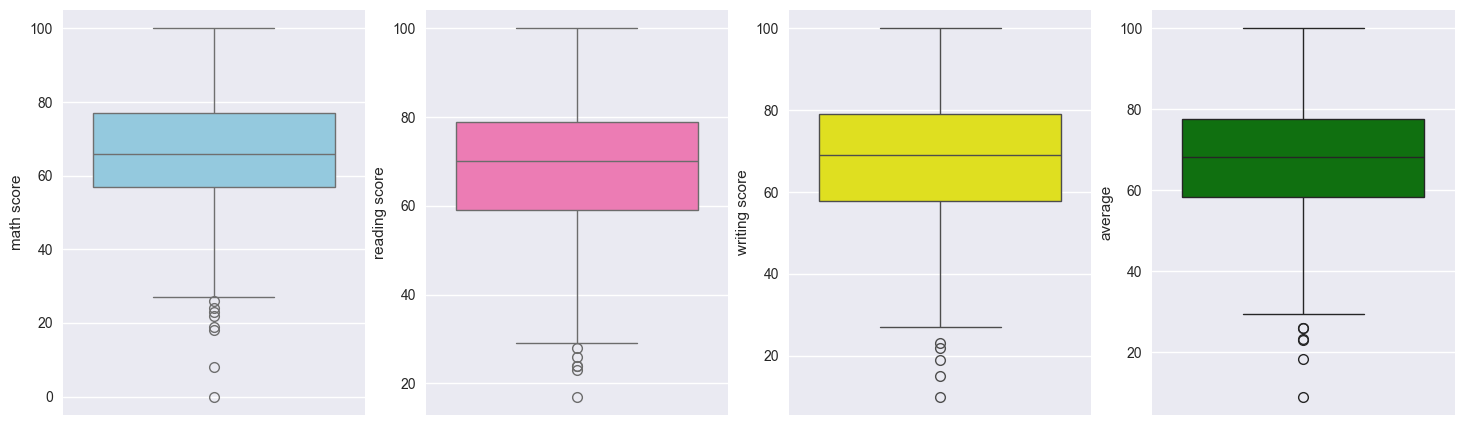

In [40]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='green')
plt.show()

# MUTIVARIATE ANALYSIS USING PAIRPLOT

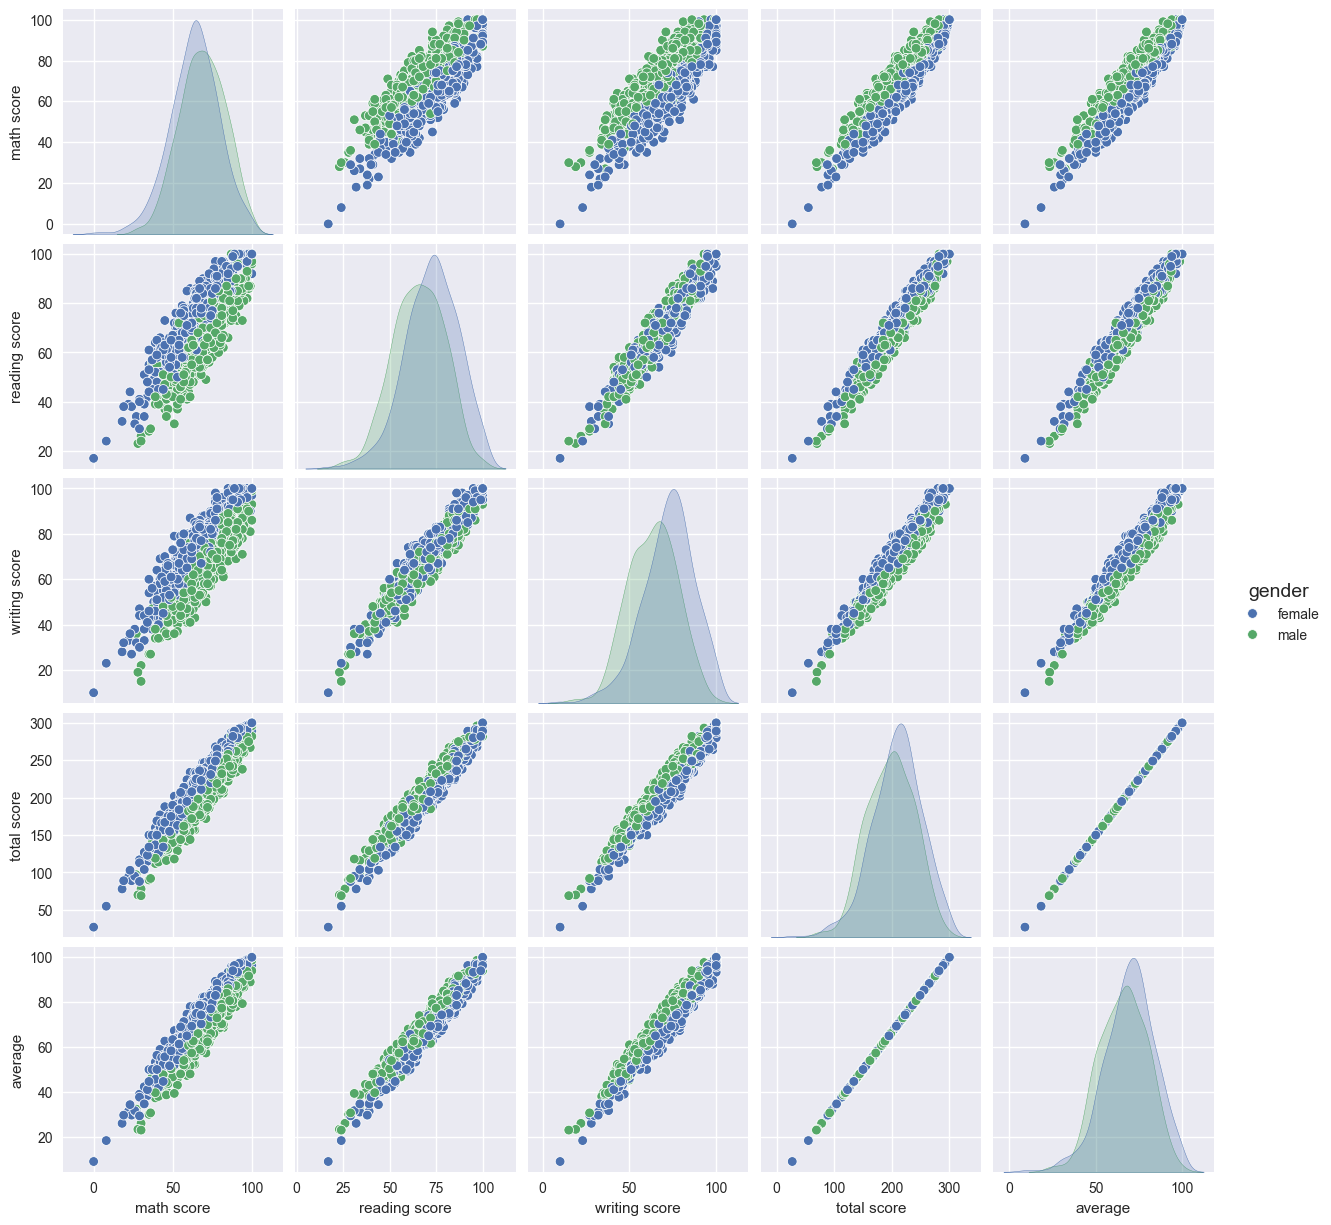

In [41]:
sns.pairplot(df,hue = 'gender')
plt.show()

from the above plot it is clear that all the scores increase linearly with each other

# CONCLUSION
### Student's performance is related with lunch,race,parental level education
### Females lead pass percentages and also are top scorers
### Student's performance is not much related with test preparation course
### Finishing Preparation course is benefitial